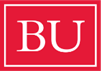 
<div style="text-align: center"> <h1>Assignment - 2</div>


<div style="text-align: center"> <h3>AD616 A4 Enterprise Risk Analytics (Spring 2024)</div>


<div style="text-align: center"> <h4>Submitted by: Aishwarya Malhotra (U17161095)</div>


#### Solution - 1 a]

In [26]:
library(tidyverse)


In [27]:
#Initializing seed, specifying the number of uniform samples and number of trails 
set.seed(123)
n <- 100
trials <- 10000

In [28]:
#Generate uniform samples
uniform_samples <- matrix(runif(n * trials, min = 0, max = 1), ncol = n)

In [29]:
#Calculate the sum of each row
sample_sums <- rowSums(uniform_samples)

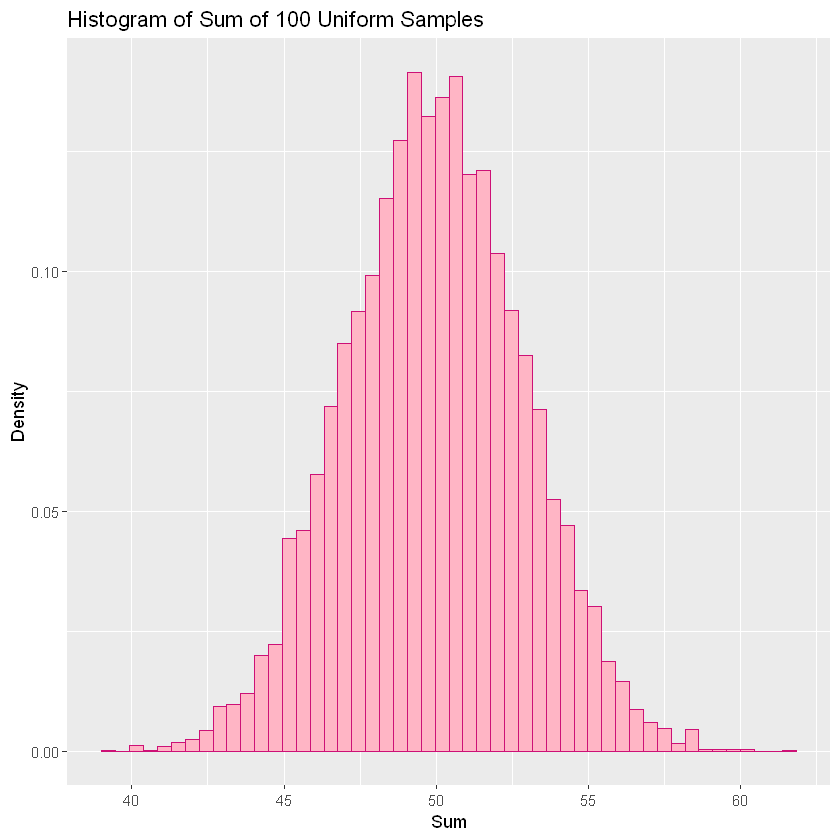

In [30]:
# Plot histogram of the sum of uniform samples
ggplot(data.frame(sample_sums), aes(x = sample_sums)) +
  geom_histogram(bins = 50, fill = "pink1", col = "deeppink3", aes(y = ..density..)) + 
  ggtitle("Histogram of Sum of 100 Uniform Samples") + 
  xlab("Sum") + 
  ylab("Density")

In [31]:
# Parameters for the normal distribution
mean_uniform <- n * 0.5
var_uniform <- n * (1/12)
std_dev_uniform <- sqrt(var_uniform)
z <- seq(mean_uniform - 4 * std_dev_uniform, mean_uniform + 4 * std_dev_uniform, length.out = 100)


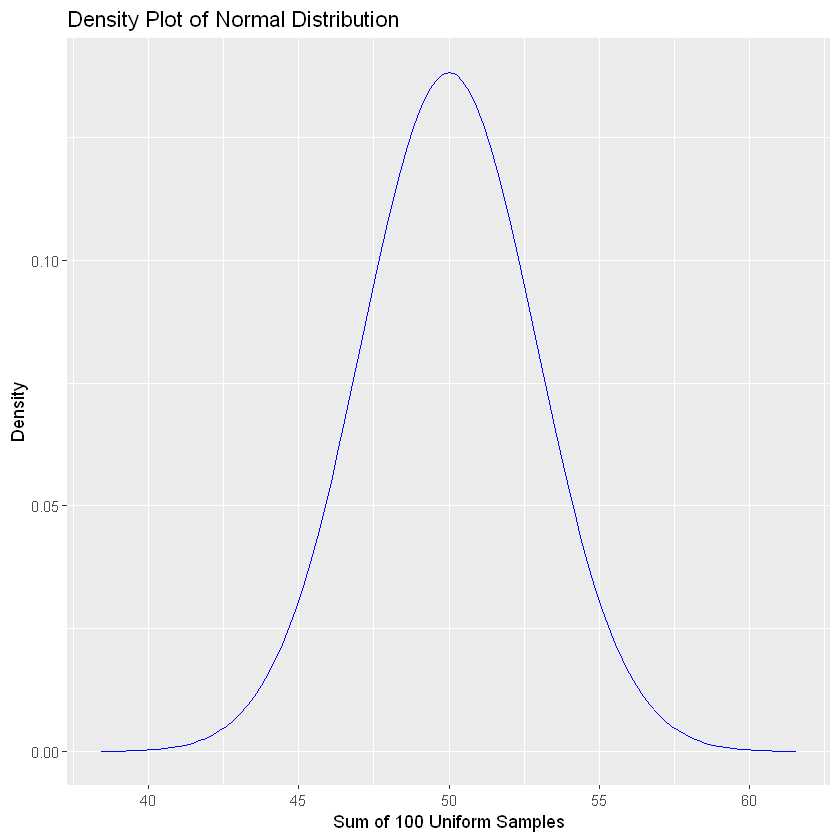

In [32]:
# Plot density plot of the normal distribution
ggplot(data.frame(z), aes(x = z)) + 
  stat_function(fun = dnorm, args = list(mean = mean_uniform, sd = std_dev_uniform), geom = "line", color = "blue") + 
  ggtitle("Density Plot of Normal Distribution") + 
  xlab("Sum of 100 Uniform Samples") + 
  ylab("Density")

In [33]:
# Calculate the mean and standard deviation of the MC simulation
mean_sample_sums <- mean(sample_sums)
std_dev_sample_sums <- sd(sample_sums)
mean_sample_sums
std_dev_sample_sums

[1] 49.9529

[1] 2.900459

> **💡Interpretation of Code💡-**
>
> The provided code conducts a Monte Carlo simulation to illustrate the Central Limit Theorem using R programming language. The code begins by setting up parameters for the simulation, such as the number of uniform random variables per trial (`n`) and the number of trials (`trials`). A seed is set for reproducibility using `set.seed(123)`. The script generates a matrix of uniform random samples using `runif()`. Each column represents a trial, and each row represents a single uniform random variable. The matrix has dimensions `n * trials`. The script sums each row of the matrix to get the total sum of the uniform random variables for each trial using `rowSums()`. A histogram of the sum of uniform samples is created using `ggplot`. The histogram represents the distribution of the sum across all trials. Density plot of the normal distribution is generated using `ggplot` and `stat_function()`.  The mean and standard deviation of the sum of uniform samples obtained from the Monte Carlo simulation using `mean()` and `sd()` functions.

> **💡Interpretation of Results💡-**
>
> Histogram of Sum of 100 Uniform Samples:
> The histogram shows the distribution of the sums of 100 uniform random variables obtained from 10,000 trials. The distribution appears approximately normal, with the center around 50, and it shows the variability in the sums across the trials
>
> Density Plot of Normal Distribution:
The density plot represents the theoretical normal distribution calculated using the mean and standard deviation of the sum of 100 uniform random variables. It aligns well with the histogram, indicating that the sum of 100 uniform variables indeed follows a normal distribution as expected by the Central Limit Theorem.
>
>  Mean: The mean of the sum of 100 uniform random variables obtained from the Monte Carlo simulation is 49.952899853752.
>
> Standard Deviation: The standard deviation of the sum is 2.90045902348823, indicating the spread or variability of the sum across the trails.
>
 

#### Solution - 1 b]

In [34]:
#Initializing seed, specifying the number of uniform samples and number of trails 
set.seed(123)
trials <-10000
n<-10
k<-3

In [16]:
uni_samples2 <- matrix(runif(trials*n,min=0,max=1), ncol = n)
View(uni_samples2)

In [18]:
k_lowest<-apply(uni_samples2,1,sort)[k,]
View(k_lowest)


Call:
	density.default(x = beta_dist)

Data: beta_dist (10000 obs.);	Bandwidth 'bw' = 0.1157

       x                 y            
 Min.   :-0.3402   Min.   :0.0000787  
 1st Qu.: 0.5968   1st Qu.:0.1101579  
 Median : 1.5339   Median :0.1995096  
 Mean   : 1.5339   Mean   :0.2664856  
 3rd Qu.: 2.4710   3rd Qu.:0.3417389  
 Max.   : 3.4081   Max.   :1.0004741  

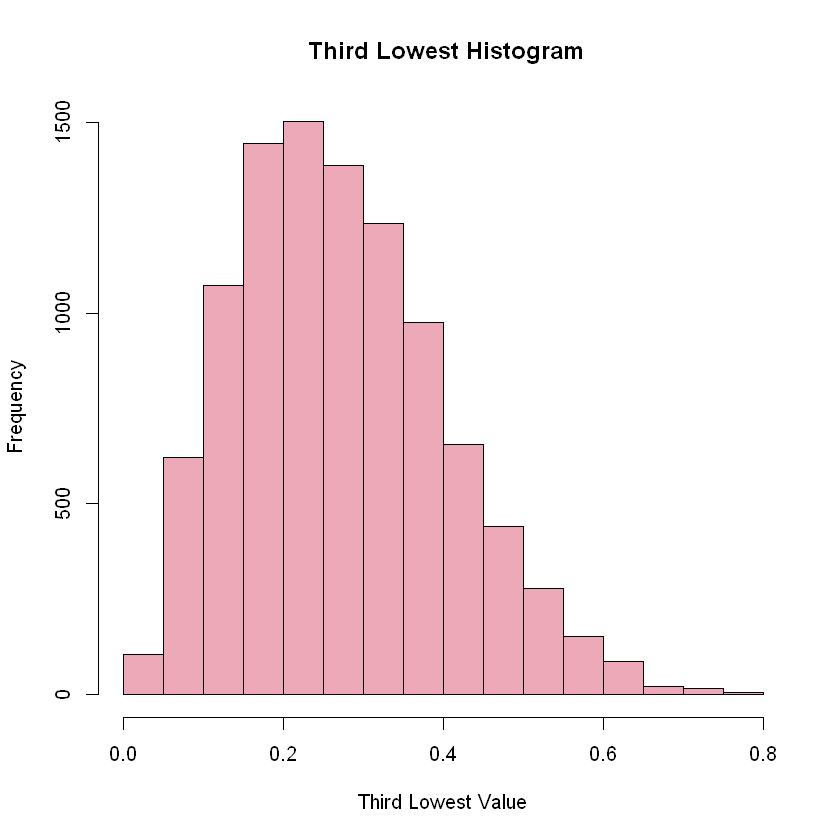

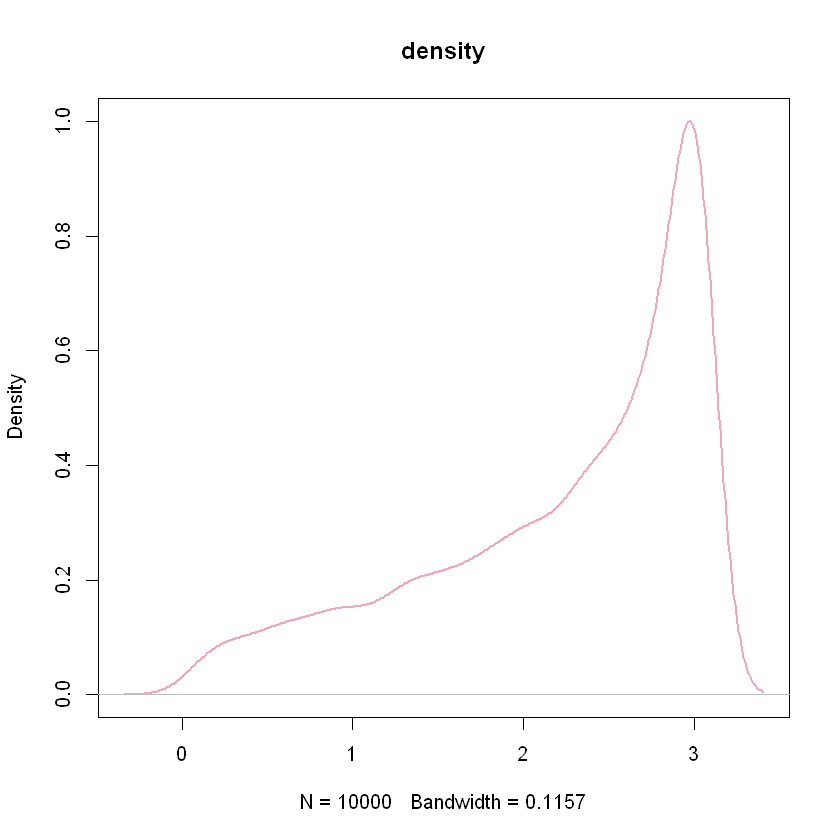

In [25]:
#Histogram 
hist(k_lowest, main = " Third Lowest Histogram", xlab = "Third Lowest Value", col = "pink2")

#Line Graph
S1 <- k
S2 <- n+1-k
beta_dist <- dbeta(k_lowest, S1, S2)
density(beta_dist)
plot(density(beta_dist),col="pink2",lwd=2,main="density")


In [24]:
#Mean and standard deviation
mean(k_lowest)
sd(k_lowest)

[1] 0.2726458

[1] 0.1288151

> **💡Interpretation of Results💡-**
>We conducted a Monte Carlo simulation by generating a matrix consisting of 100 random uniform variables in each of the 10,000 trials. After sorting the matrix row-wise in ascending order, we selected the third column, which corresponds to the third lowest value across all trials. Next, we constructed a beta distribution with shape parameters 1= k and shape 2= n+1-k where is k is 3 and n represents the 10000 trails to model the distribution of the third lowest values. We then plotted the density plot for this beta distribution. Following that, we computed the mean and standard deviation of the Monte Carlo simulation results.

#### Solution - 2

In [54]:
set.seed(123)

# Define the rate of the exponential distribution & specify the number of trials
rate <- 10
trials <- 10000


In [55]:
# Simulate the time until the next purchase for each trial
time_until_purchase <- matrix(rexp(trials*100, rate),ncol=100)
y<-apply(time_until_purchase,1,cumsum)

z<-t(y)

results<-matrix(0,nrow=nrow(z),ncol=ncol(z))

for(i in 1:nrow(z)){
  for(j in 1:ncol(z)){
    if(z[i,j]<=1){
      results[i,j]<-TRUE
    }
    else{
      results[i,j]<-FALSE
    }
  }
}

final_results<-rowSums(results)


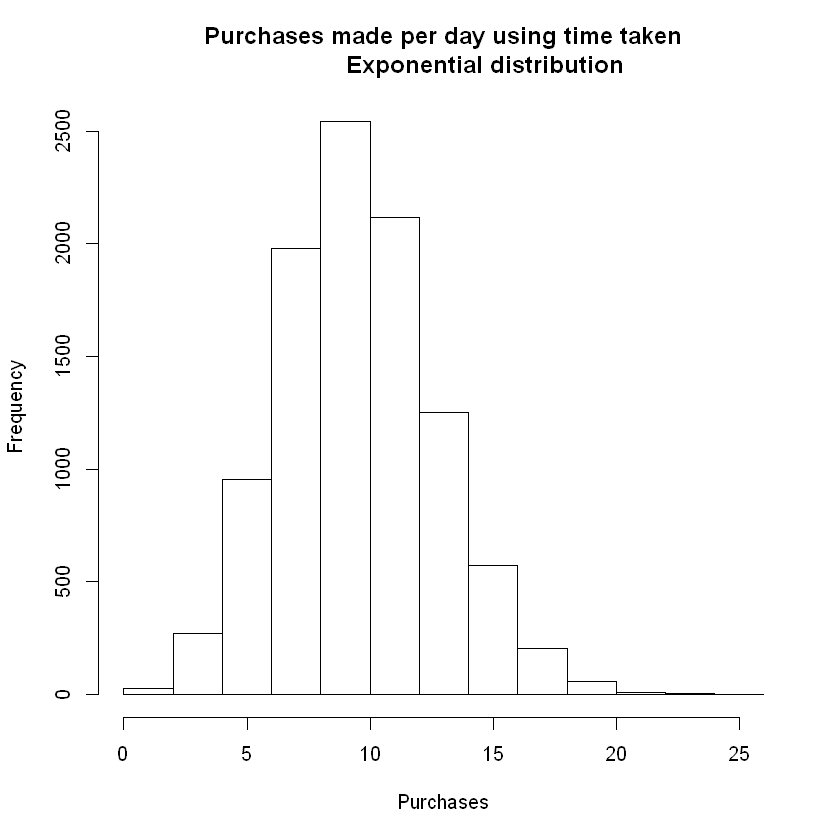

In [56]:
# Histogram
hist(final_results,
     main="Purchases made per day using time taken
            Exponential distribution",
     xlab="Purchases",
     ylab="Frequency")


In [57]:
# Calculate the number of purchases per day for each trial

purchases_per_day <- rpois(trials, lambda = 10)

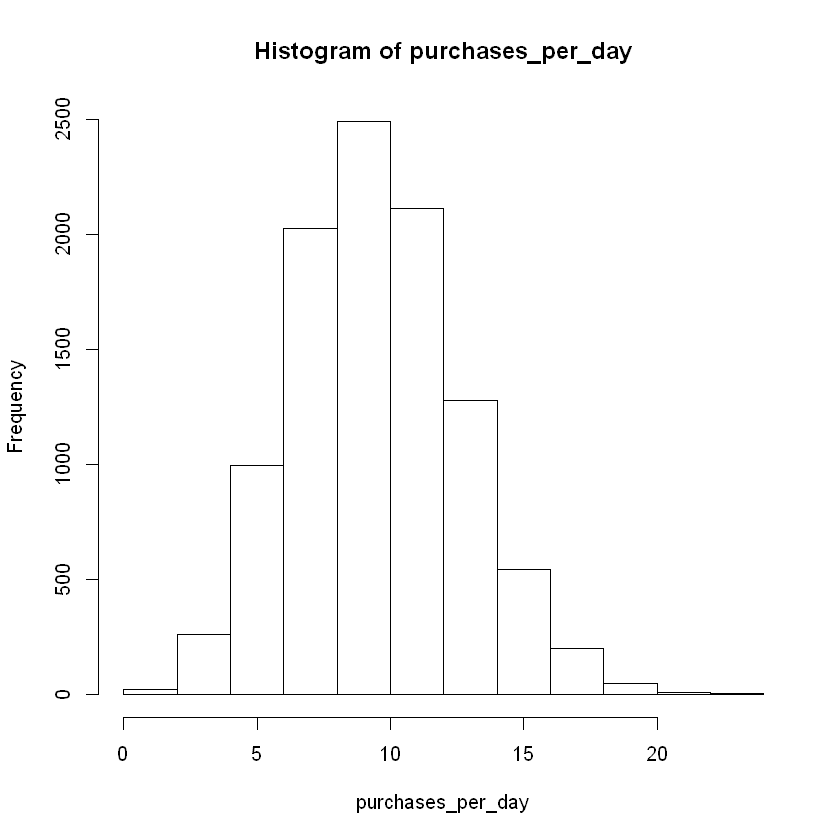

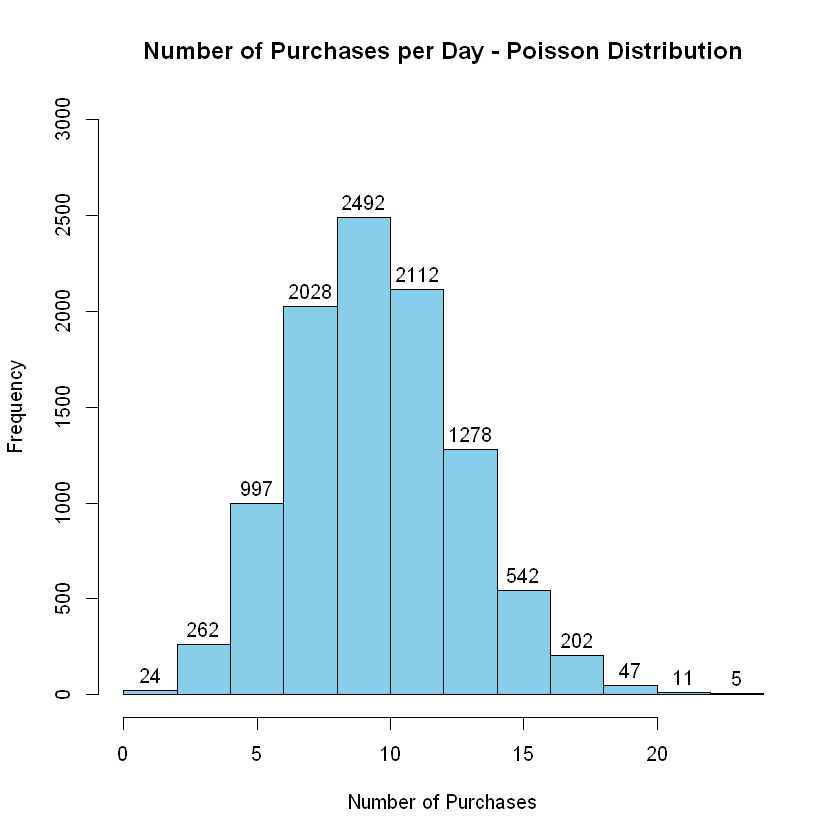

In [58]:
# Histogram
hist(purchases_per_day, 
     col = "skyblue",
     border = "black",
     main = "Number of Purchases per Day - Poisson Distribution",
     xlab = "Number of Purchases",
     ylab = "Frequency",
     xlim = c(0, max(purchases_per_day)), 
     ylim = c(0, max(hist(purchases_per_day)$counts) + 500), 
     labels = TRUE,         
     )

> **💡Interpretation of Results💡-**
> 
> We initiated the analysis by generating a matrix representing random exponential distribution variables for 10,000 trials, each at a rate of 10. To ensure the time taken reached approximately one day, we expanded the trials by a factor of 100.
>
> Subsequently, we performed cumulative summation on each row of the resulting matrix and transposed it back to its original orientation. This process facilitated the calculation of the purchases made during each day.
>
> Following this, we initialized a new matrix to store the outcomes. Iterating through each element of the matrix, we assessed whether it reached one day, assigning a value of "true" if the element was less than one and "false" otherwise. Summing the rows of the resulting matrix yielded the exponential distribution of purchases made during each day based on time taken.
>
> The resulting histogram showcased the distribution of purchases per day under the exponential distribution assumption.
>
> Furthermore, we generated a random Poisson distribution for the 10,000 trials with a lambda value of 10 to estimate the purchases made per day. The resulting histogram illustrated the distribution of purchases per day under the Poisson distribution assumption.
>


#### Solution - 3 a]

In [73]:
# Set seed for reproducibility
set.seed(123)

In [74]:
# Define parameters
shape <- 4.5
scale <- 39
premium <- 115
benefit <- 1000000
rate <- 0.065
n <- 10000
terms <- 240

In [81]:
cashflows<-c()
cashperiods<-c()


In [84]:
# Simulate cash flows and periods for each iteration
for(i in 1:n){
  weibull <- rweibull(1,shape,scale)
  term <- weibull*12
  death <- ifelse(term<terms,1,0)
  plapse <- rgeom(1,0.997)
  if (plapse==1){
    cashflow <- term*premium
    cash_period <- term
  }
  else if(term>terms){
    cashflow <- terms*premium
    cashperiod <- terms
  }
  else if(term<terms){
    cashflow <- term*premium-benefit
    cashperiod <- term
  }
  cashflows <- c(cashflows,cashflow)
  cashperiods <- c(cashperiods,cashperiod)
}


In [85]:
mainnpv <- c()

for(i in 1:n){
  npv <- sum(cashflows[i] / ((1 + rate/12)^(1:length(cashperiods[i]))))
  mainnpv <- c(mainnpv,npv)
}

options(scipen = 10000)


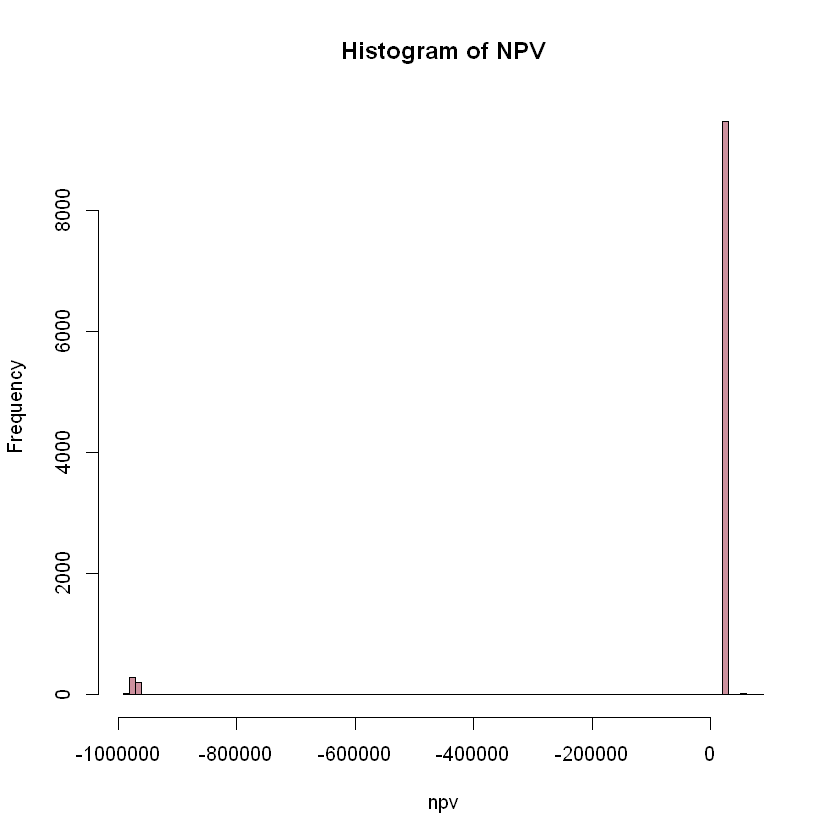

In [86]:
hist(mainnpv,breaks=100,col="pink3",main="Histogram of NPV",xlab = "npv")


In [87]:
#Calculate the mean and standard deviation of the NPV
mean_npv<-mean(mainnpv)
sd_npv<-sd(mainnpv)


In [88]:
# Calculate the profitability of the insurance company
profit <- mean_npv > 0
if (profit) {
  message("making a profit.")
} else {
  message("Not making a profit.")
}


Not making a profit.


In [89]:
# 95% confidence interval for the mean of the NPV
cp <- t.test(mainnpv)$conf.int

In [90]:
# Interpret the result
message("	 95% confidence interval for the mean of the NPV (", cp[1], ", ", cp[2], ").")

#	How many iterations would be necessary to provide a 99% confidence interval with a half width of $200
n_ite <- ceiling((qnorm(0.995) * sd_npv / 200)^2)

message("The number of iterations needed for a 99% confidence interval with a half width of $200 is ", n_ite)


	 95% confidence interval for the mean of the NPV (-26279.2483415651, -17770.5238348837).
The number of iterations needed for a 99% confidence interval with a half width of $200 is 7813431


In [91]:
# The company can be 90% sure their npv will be at least x
x <- quantile(mainnpv, 0.1, type = 1)

message("The company can be 90% sure their NPV will be at least $", round(x, 2), ".")


The company can be 90% sure their NPV will be at least $27451.31.


In [92]:
# The company can be 99% sure their npv will be at least y
y <- quantile(mainnpv, 0.01, type = 1)


message("The company can be 99% sure their NPV will be at least $", round(y, 2), ".")


The company can be 99% sure their NPV will be at least $-975229.71.


> **💡Interpretation of Results💡-**
> 
> We initialized the analysis by setting parameters such as shape, scale, premium, benefit, rate, the number of simulations n, and terms. These parameters were utilized to model cash flows in an insurance context.
> Subsequently, we simulated cash flows and their corresponding periods for n  iterations. We employed the Weibull distribution to generate the time until an event occurs, such as policy lapse or death. Based on these events and the policy terms, we calculated cash flows accordingly.
> The resulting cash flows were then used to compute the Net Present Value (NPV) for each iteration, considering a discount rate of 6.5%  annually. Histogram of NPV values was plotted to visualize the distribution of NPVs.
> Furthermore, we computed the mean and standard deviation of the NPV, assessed the profitability of the insurance company, and determined a 95% confidence interval for the mean NPV using a t-test. Additionally, we calculated the number of iterations needed to achieve a 99% confidence interval with a half-width of $200.
> Lastly, we estimated the minimum NPV values at which the company can be 90% and 99% confident. This information provides insights into the financial stability and risk management of the insurance company.

#### Solution - 3 b]

In [93]:
# Set seed for reproducibility
set.seed(123)

In [94]:
# Define parameters
shape <- 4.5
scale <- 39
premium <- 115
benefit <- 1000000
rate <- 0.065
n <- 1000
terms<-240


In [95]:
cashflows<-c()
cashperiods<-c()
finalterm<-c()

In [96]:
for(i in 1:n){
  weibull<-rweibull(1,shape,scale)
  term<-weibull*12
  finalterm<-c(finalterm,term)
  death<-ifelse(term<terms,1,0)
  plapse<-rgeom(1,0.997)
  if (plapse==1){
    cashflow<-term*premium
    cash_period<-term
  }
  else if(term>terms){
    cashflow<-terms*premium
    cashperiod<-terms
  }
  else if(term<terms){
    cashflow<-term*premium-benefit
    cashperiod<-term
  }
  cashflows<-c(cashflows,cashflow)
  cashperiods<-c(cashperiods,cashperiod)
}

In [97]:
mainnpv<-c()

for(i in 1:n){
  npv <- sum(cashflows[i] / ((1 + rate/12)^(1:length(cashperiods[i]))))
  mainnpv<-c(mainnpv,npv)
}


In [98]:
#Dataframe storing the values
df<-data.frame(finalterm,cashflows,cashperiods,mainnpv)

options(scipen = 10000)


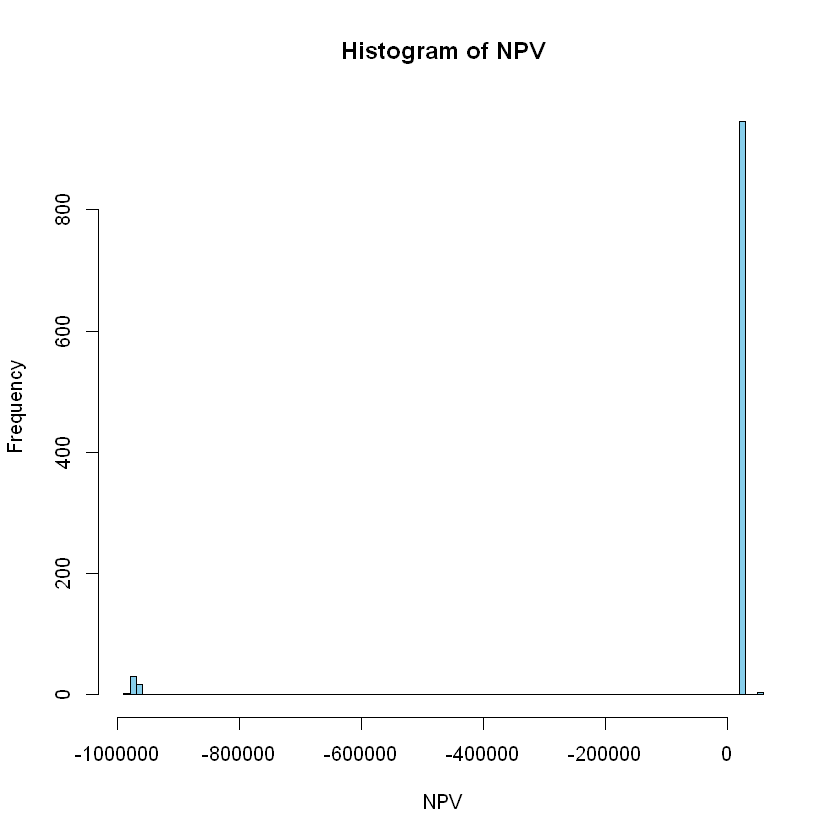

In [105]:
# Create a histogram of the NPV
hist(mainnpv,breaks=100,col="skyblue",main="Histogram of NPV",xlab="NPV")

# Calculate the mean and standard deviation of the NPV
mean_npv<-mean(mainnpv)
sd_npv<-sd(mainnpv)


In [107]:
# Calculate the profitability of the insurance company
profit <- mean_npv > 0
if (profit) {
  message("making a profit.")
} else {
  message("Not making any profit.")
}


Not making any profit.


In [108]:
# 95% confidence interval for the mean of the NPV
cp <- t.test(mainnpv)$conf.int

# Interpret the result
message("The 95% confidence interval for the mean of the NPV (", cp[1], ", ", cp[2], ").")

The 95% confidence interval for the mean of the NPV (-34863.1745713295, -8048.9167035523).


In [102]:
# How many iterations would be necessary to provide a 99% confidence interval with a half width of $200
n_ite <- ceiling((qnorm(0.995) * sd_npv / 200)^2)

message("The number of iterations needed for a 99% confidence interval with a half width of $200 is ", n_ite)

The number of iterations needed for a 99% confidence interval with a half width of $200 is 7742774


In [103]:
# The company can be 90% sure their npv will be at least x
x <- quantile(mainnpv, 0.1, type = 1)

message("The company can be 90% sure their NPV will be at least $", round(x, 2), ".")


The company can be 90% sure their NPV will be at least $27451.31.


In [104]:
# The company can be 99% sure their npv will be at least y
y <- quantile(mainnpv, 0.01, type = 1)


message("The company can be 99% sure their NPV will be at least $", round(y, 2), ".")

The company can be 99% sure their NPV will be at least $-976160.54.


> **💡Interpretation of Results💡-**
> 
> 1. **Profitability Assessment**: The analysis indicates that the insurance company is not making a profit. This conclusion is drawn from the mean NPV value being negative, suggesting that, on average, the company's cash flows are insufficient to cover its expenses and liabilities.
>
> 2. **95% Confidence Interval for Mean NPV**: The 95% confidence interval for the mean NPV ranges from approximately -$34,863 to -$8,049. This interval provides a range within which we can be 95% confident that the true mean NPV of the insurance company lies.
>
> 3. **Number of Iterations for 99% Confidence Interval**: To achieve a 99% confidence interval with a half-width of $200, approximately 7,742,774 iterations would be necessary. This large number indicates the precision required to estimate the mean NPV with such a high level of confidence and small margin of error.
>
> 4. **Minimum NPV for 90% Confidence**: The insurance company can be 90% confident that its NPV will be at least $27,451.31. This value serves as a threshold below which the company can be reasonably confident that its financial performance will not fall.
>
> 5. **Minimum NPV for 99% Confidence**: With 99% confidence, the insurance company can expect its NPV to be at least -$976,160.54. This value provides a more conservative estimate, indicating the minimum level of NPV below which the company can be highly confident about its financial standing.
>
> Overall, these interpretations provide insights into the financial health and risk exposure of the insurance company, guiding decision-making processes regarding investment, pricing strategies, and risk management.